In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import poisson, linregress

df = pd.read_csv("vgsales.csv")
df.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [39]:
#Question 1 
#Top Selling Video Games Of all Time

top_sell = df.sort_values('Global_Sales',ascending = False)
print("Top Selling Video Games of all time:")
print(top_sell[['Name','Global_Sales']])


Top Selling Video Games of all time:
                                       Name  Global_Sales
0                                Wii Sports         82.74
1                         Super Mario Bros.         40.24
2                            Mario Kart Wii         35.82
3                         Wii Sports Resort         33.00
4                  Pokemon Red/Pokemon Blue         31.37
...                                     ...           ...
16186                           BattleForge          0.01
16187                        Jewel Quest II          0.01
16188                      Toro to Morimori          0.01
16189  Sonic & All-Stars Racing Transformed          0.01
16597                      Spirits & Spells          0.01

[16598 rows x 2 columns]


In [47]:
# Question 2 Most Popular Platform
pop_plat = df.groupby('Platform')['Global_Sales'].sum().sort_values(ascending=False)
print("\nMost popular platform:")
#print(pop_plat)


Most popular platform:


In [48]:
# Question 2 Using Pivot_table
popular_platform = df.pivot_table(values = 'Global_Sales', index ='Platform', aggfunc = 'sum')
popular_platform = popular_platform.sort_values(by='Global_Sales', ascending=False)
#print(popular_platform)

<Figure size 720x432 with 0 Axes>

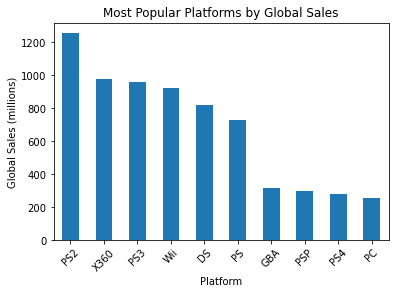

In [50]:
#Plot Popular Platform

plt.figure(figsize=(10, 6))
popular_platform.head(10).plot(kind='bar', legend=False)
plt.title('Most Popular Platforms by Global Sales')
plt.xlabel('Platform')
plt.ylabel('Global Sales (millions)')
plt.xticks(rotation=45)
plt.show()


In [61]:
#Question 3 Most Popular Genre

popular_gen = df.groupby('Genre')['Global_Sales'].sum().sort_values(ascending = False)
print("Most popular genre based on sales:")
print(popular_gen)

Most popular genre based on sales:
Genre
Action          1751.18
Sports          1330.93
Shooter         1037.37
Role-Playing     927.37
Platform         831.37
Misc             809.96
Racing           732.04
Fighting         448.91
Simulation       392.20
Puzzle           244.95
Adventure        239.04
Strategy         175.12
Name: Global_Sales, dtype: float64


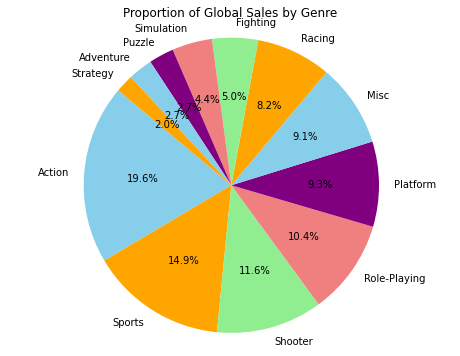

In [60]:
# Plotting The Most Popular Genre For Sales
plt.figure(figsize=(8, 6))
plt.pie(popular_gen, labels=popular_gen.index, autopct='%1.1f%%', startangle=140, 
        colors=['skyblue', 'orange', 'lightgreen', 'lightcoral', 'purple'])
plt.title('Proportion of Global Sales by Genre')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

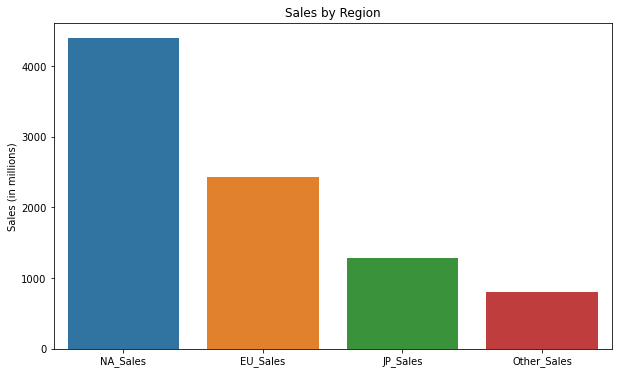

In [9]:
#Question 4
#Sales Variation By Region

reg_sales = df[['NA_Sales', 'EU_Sales','JP_Sales','Other_Sales']].sum()
plt.figure(figsize=(10, 6))
sns.barplot(x=reg_sales.index, y=reg_sales.values)
plt.title('Sales by Region')
plt.ylabel('Sales (in millions)')
plt.show()

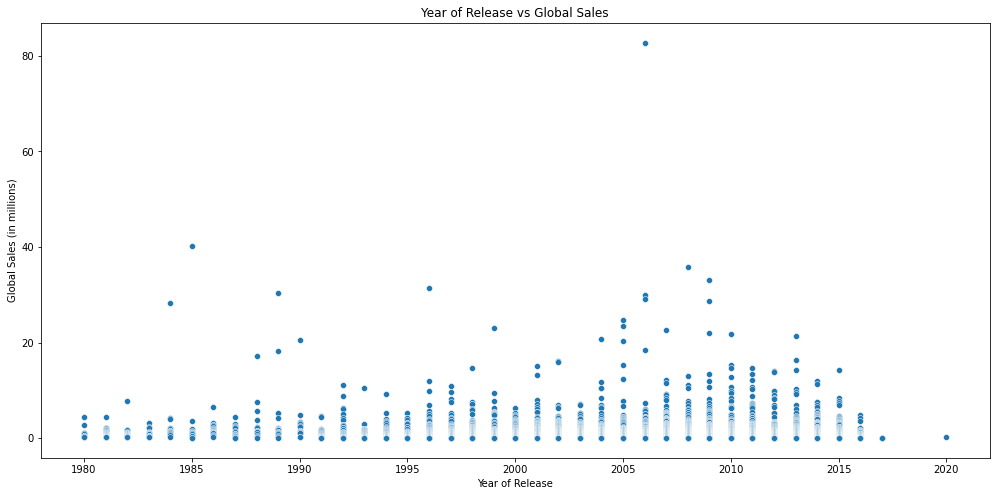

In [13]:
# Question 5
#Relationship Between Year Of Release and Sales

plt.figure(figsize=(17, 8))
sns.scatterplot(x='Year', y='Global_Sales', data=df)
plt.title('Year of Release vs Global Sales')
plt.xlabel('Year of Release')
plt.ylabel('Global Sales (in millions)')
plt.show()


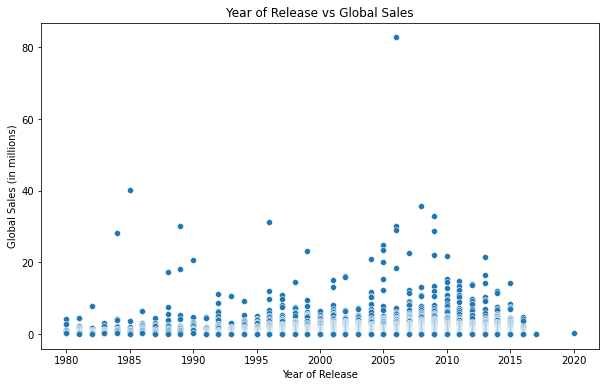

Relationship between Year of Release and Global Sales:
Slope: -0.02, Intercept: 4.1e+01, R-squared: 0.0056


In [63]:
# Regression Analysis to see if there a trend (with the help of chatgtp)

df['Year'] = pd.to_numeric(df['Year'], errors='coerce')
df['Global_Sales'] = pd.to_numeric(df['Global_Sales'], errors='coerce')

df_clean = df.dropna(subset=['Year', 'Global_Sales'])

if df_clean['Year'].nunique() > 1 and df_clean['Global_Sales'].nunique() > 1:
    # Plot relationship between year of release and sales
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x='Year', y='Global_Sales', data=df_clean)
    plt.title('Year of Release vs Global Sales')
    plt.xlabel('Year of Release')
    plt.ylabel('Global Sales (in millions)')
    plt.show()
    
    slope, intercept, r_value, p_value, std_err = linregress(df_clean['Year'], df_clean['Global_Sales'])
    print(f"Relationship between Year of Release and Global Sales:\nSlope: {slope:.2}, Intercept: {intercept:.2}, R-squared: {r_value**2 :.2}")
else:
    print("Insufficient variability in 'Year' or 'Global_Sales' to perform regression analysis.")


In [25]:
# Using Poisson Distribution For Modelling Video Game Sales

sales_mean = df['Global_Sales'].mean()
poisson_dist = poisson(mu=sales_mean)



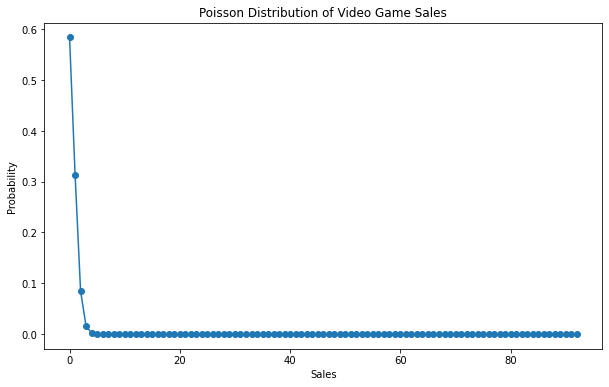


Mean Global Sales: 0.53744065550074


In [26]:
# Poisson Distribution Plot
x = np.arange(0, df['Global_Sales'].max() + 10, 1)
plt.figure(figsize=(10, 6))
plt.plot(x, poisson_dist.pmf(x), 'o-')
plt.title('Poisson Distribution of Video Game Sales')
plt.xlabel('Sales')
plt.ylabel('Probability')
plt.show()

print(f"\nMean Global Sales: {sales_mean}")

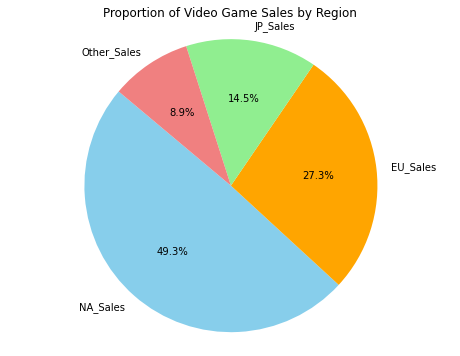

In [27]:
# Sales Distribution Plot
plt.figure(figsize=(8, 6))
plt.pie(reg_sales, labels=reg_sales.index, autopct='%1.1f%%', startangle=140, colors=['skyblue', 'orange', 'lightgreen', 'lightcoral'])
plt.title('Proportion of Video Game Sales by Region')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

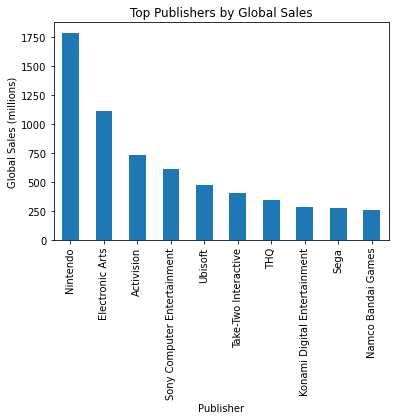

In [35]:
# Relationship Between The sales and the Publisher

pub_sales = df.groupby('Publisher')['Global_Sales'].sum()
pub_sales = pub_sales.sort_values(ascending=False)
pub_sales.head(10).plot(kind='bar')
plt.title('Top Publishers by Global Sales')
plt.xlabel('Publisher')
plt.ylabel('Global Sales (millions)')
plt.show()

In [37]:
# Question 6
publisher_sales = df.pivot_table(values='Global_Sales', index = 'Publisher', aggfunc = 'sum')

publisher_sales = publisher_sales.sort_values(by='Global_Sales', ascending=False)



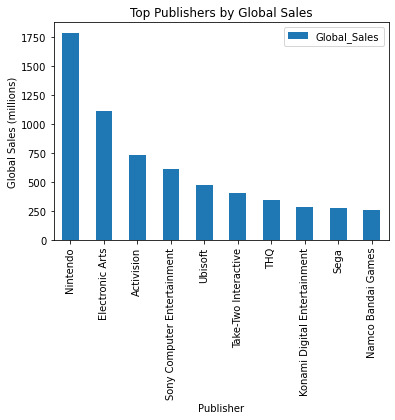

In [38]:
# Plotting Data
publisher_sales.head(10).plot(kind='bar')
plt.title('Top Publishers by Global Sales')
plt.xlabel('Publisher')
plt.ylabel('Global Sales (millions)')
plt.show()

In [66]:
# Question 7
# Poisson distribution to model video game sales data

mean_sales = df['Global_Sales'].mean()
variance_sales = df['Global_Sales'].var()

exp_mean = variance_sales
exp_var = variance_sales

print('Mean of global sales data:', mean_sales)
print('Variance of global sales data:', variance_sales)
print('Expected mean of Poisson distribution:', exp_mean)
print('Expected variance of Poisson distribution:', exp_var)



Mean of global sales data: 0.53744065550074
Variance of global sales data: 2.4181118804027917
Expected mean of Poisson distribution: 2.4181118804027917
Expected variance of Poisson distribution: 2.4181118804027917


In [67]:
# Alternative approach

m_sales = np.mean(df['Global_Sales'])
var_sales = np.var(df['Global_Sales'], ddof=1)
exp_mean = mean_sales
exp_var = mean_sales

print('Mean of global sales data:', m_sales)
print('Variance of global sales data:', var_sales)
print('Expected mean of Poisson distribution:', exp_mean)
print('Expected variance of Poisson distribution:', exp_var)


Mean of global sales data: 0.53744065550074
Variance of global sales data: 2.4181118804027917
Expected mean of Poisson distribution: 0.53744065550074
Expected variance of Poisson distribution: 0.53744065550074
